In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

In [246]:
Mexico  = pd.read_csv('Mexico_datos_limpios.csv')
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   listing_url                                   26582 non-null  object 
 2   last_scraped                                  26582 non-null  object 
 3   description                                   26582 non-null  object 
 4   host_url                                      26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_response_rate                            26582 non-null  object 
 8   host_acceptance_rate                          26582 non-null  object 
 9   host_is_superhost                             26582 non-null 

**Analisis univariado de las variables categoricas**

In [247]:
# Vemos las tablas de frecuencia de las variables categóricas
categorical_columns = Mexico.select_dtypes(include=['object', 'category']).columns

# Inicializar el contador
contador = 0

for col in categorical_columns:
    contador += 1
    print(f"Tabla de frecuencias {contador} para la columna '{col}':")
    print(freq_tbl(Mexico[col]))
    print("\n")

# Mostrar el total de tablas de frecuencias generadas
print(f"Total de tablas de frecuencias generadas: {contador}")

Tabla de frecuencias 1 para la columna 'listing_url':
                                            listing_url  frequency  \
0                    https://www.airbnb.com/rooms/35797          1   
1       https://www.airbnb.com/rooms/897363738676670896          1   
2       https://www.airbnb.com/rooms/897393613987324079          1   
3       https://www.airbnb.com/rooms/894989092198576906          1   
4       https://www.airbnb.com/rooms/894977949284306624          1   
...                                                 ...        ...   
26577             https://www.airbnb.com/rooms/47124933          1   
26578             https://www.airbnb.com/rooms/47123755          1   
26579             https://www.airbnb.com/rooms/47036712          1   
26580             https://www.airbnb.com/rooms/47035738          1   
26581  https://www.airbnb.com/rooms/1252229157495978163          1   

       percentage  cumulative_perc  
0        0.000038         0.000038  
1        0.000038         0.000

**Extracción de Caracteristicas de "room_type"**

In [248]:
#Obtengo un analisis univariado de la variable categorica room_type
table1 = freq_tbl(Mexico['room_type'])
table1 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table1 = table1.set_index('room_type')
table1

frequency
room_type                 
Entire home/apt      17363
Private room          8693
Shared room            401
Hotel room             125

<Axes: ylabel='frequency'>

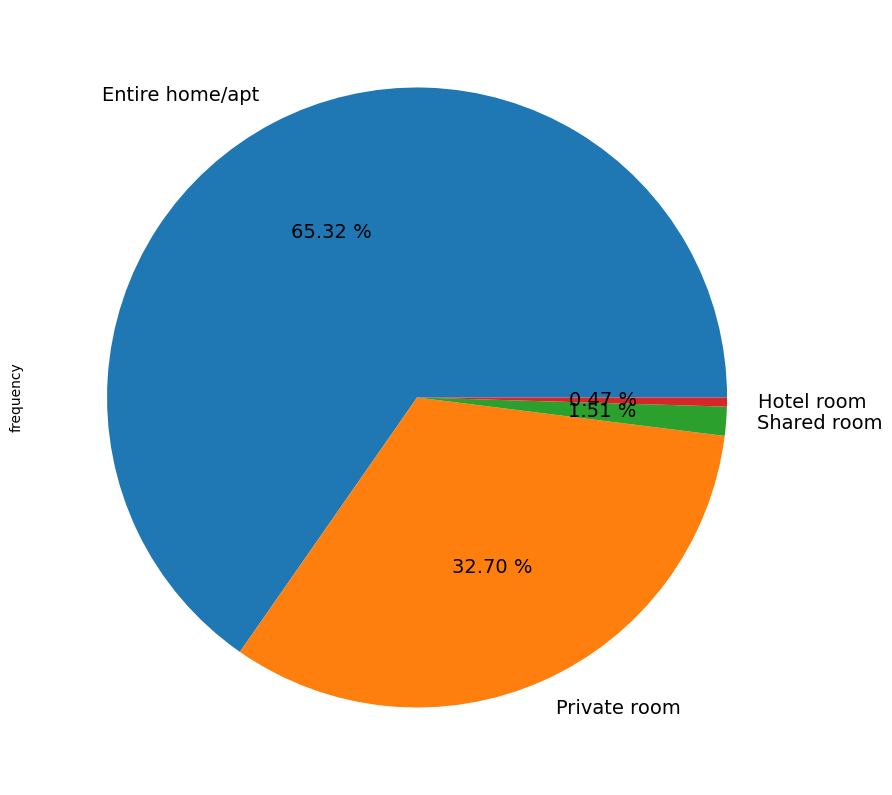

In [249]:
#realizamos grafico de pastel 
table1["frequency"].plot(kind='pie', figsize=(10, 15), autopct='%0.2f %%', textprops={'fontsize': 14, })

**Extracción de Caracteristicas de "property_type"**

In [250]:
#Obtengo un analisis univariado de la variable categorica room_type
table2 = freq_tbl(Mexico['property_type'])
table2 = table2.drop(['percentage', 'cumulative_perc'], axis=1)
table2 = table2[table2['frequency'] > 15]
table2 = table2.set_index('property_type')
table2

frequency
property_type                                
Entire rental unit                       9971
Entire condo                             3423
Private room in rental unit              3034
Private room in home                     2266
Entire loft                              1515
Private room in condo                     846
Entire serviced apartment                 846
Entire home                               817
Room in hotel                             504
Private room in guesthouse                381
Private room in serviced apartment        284
Private room in guest suite               276
Private room in bed and breakfast         269
Entire guest suite                        241
Private room in casa particular           211
Room in boutique hotel                    174
Private room in loft                      130
Shared room in home                       111
Entire guesthouse                         100
Shared room in hostel                      97
Private room in hostel                     96
Private room in townhouse                  86
Shared room in rental unit                 70
Shipping container                         68
Room in aparthotel                         68
Tiny home                                  67
Entire townhouse                           52
Shared room in guesthouse                  51
Entire vacation home                       48
Private room                               43
Casa particular                            36
Private room in tiny home                  32
Entire place                               31
Room in serviced apartment                 29
Entire cabin                               28
Shared room in bed and breakfast           26
Private room in vacation home              23
Private room in cabin                      18
Holiday park                               17
Entire cottage                             17

<Axes: xlabel='property_type'>

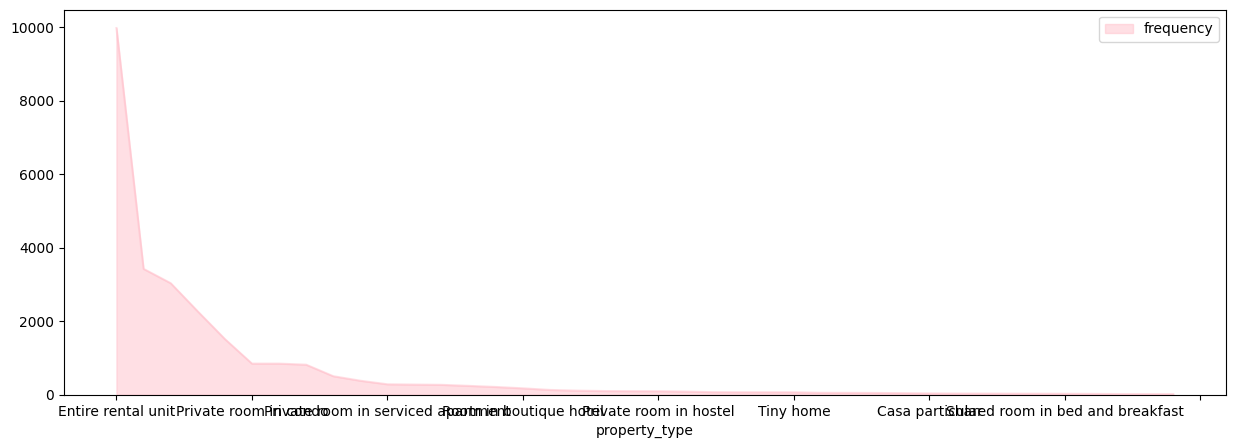

In [251]:
#Realizamos un grafico de area del dataframe filtrado
table2.plot(kind='area', color='pink', figsize=(15, 5),alpha=0.5)

**Extracción de Caracteristicas de "neighbourhood_cleansed"**

In [252]:
table3 = freq_tbl(Mexico['neighbourhood_cleansed'])
table3 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
table3 = table3.set_index('neighbourhood_cleansed')
table3

frequency
neighbourhood_cleansed           
Cuauhtémoc                  12231
Miguel Hidalgo               4533
Benito Juárez                3152
Coyoacán                     1719
Álvaro Obregón               1075
Tlalpan                       812
Venustiano Carranza           734
Gustavo A. Madero             506
Cuajimalpa de Morelos         442
Iztacalco                     399
Azcapotzalco                  349
Iztapalapa                    266
La Magdalena Contreras        143
Xochimilco                    143
Tláhuac                        50
Milpa Alta                     28

<Axes: ylabel='frequency'>

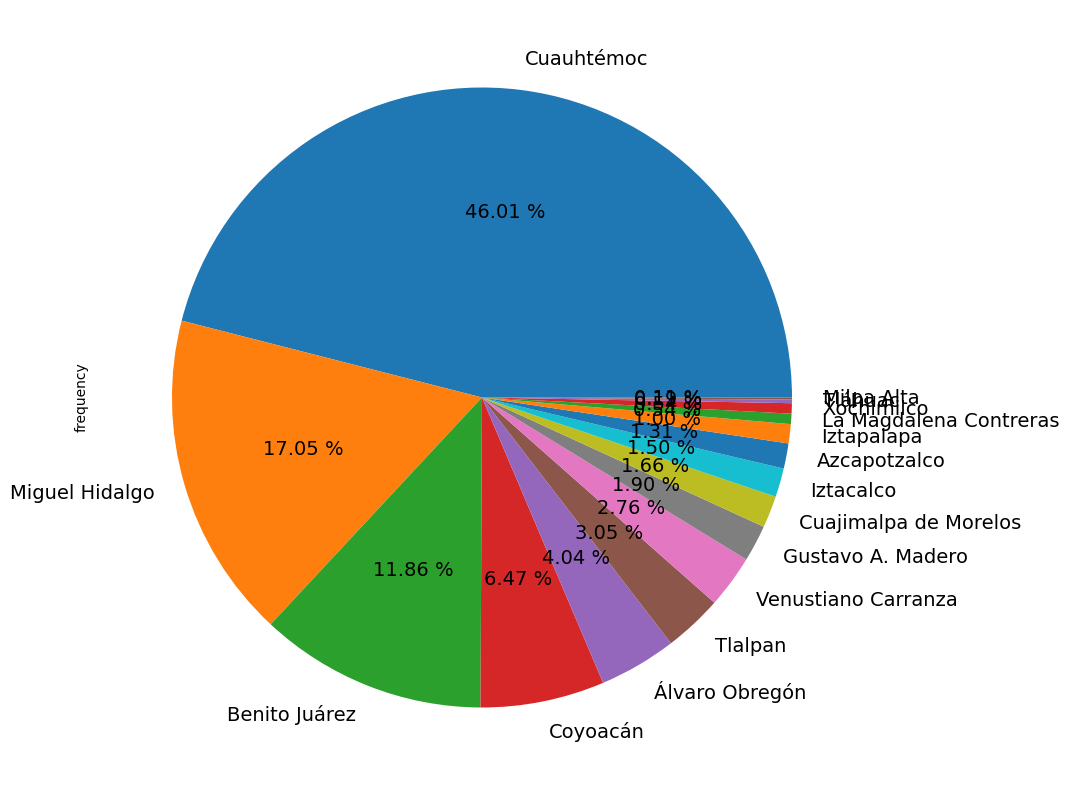

In [253]:
#realizamos grafico de pastel 
table3["frequency"].plot(kind='pie', figsize=(10, 15), autopct='%0.2f %%', textprops={'fontsize': 14, })

**Extracción de Caracteristicas de "last_scraped"**

In [254]:
#Obtengo un analisis univariado de la variable categorica room_type
table4 = freq_tbl(Mexico['last_scraped'])
table4 = table4.drop(['percentage', 'cumulative_perc'], axis=1)
table4 = table4.set_index('last_scraped')
table4

frequency
last_scraped           
2024-09-25        15745
2024-09-26        10837

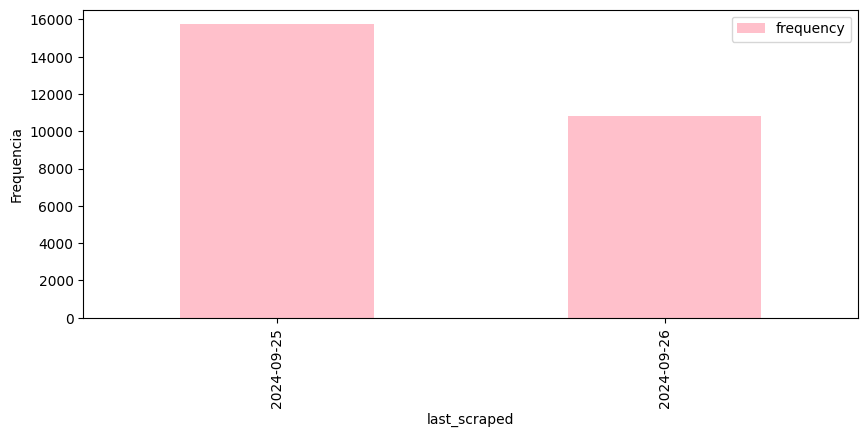

In [255]:
#Realizamos un grafico de barras para visualizar los datos
table4.plot(kind='bar', color='pink', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_scraped')
plt.show()

**Extracción de Caracteristicas de "host_since"**

In [256]:
#Obtengo un analisis univariado de la variable categorica room_type
table5 = freq_tbl(Mexico['host_since'])
table5 = table5.drop(['percentage', 'cumulative_perc'], axis=1)
table5 = table5[table5['frequency'] > 40]
table5 = table5.set_index('host_since')
table5

frequency
host_since           
2023-01-30        267
2013-12-22        216
2020-02-02        177
2023-09-28        174
2016-04-27        156
2018-08-04        129
2023-01-26        127
2019-02-26        116
2016-08-22        115
2014-11-07        107
2019-10-15        101
2015-12-01         92
2015-02-09         81
2019-07-15         70
2016-09-07         68
2023-01-24         63
2014-05-11         59
2016-03-01         57
2018-11-22         57
2020-06-02         55
2017-09-14         54
2021-05-27         54
2020-07-29         53
2016-11-23         51
2015-01-02         50
2015-06-07         48
2014-11-05         46
2015-02-16         46
2015-08-27         46
2019-08-12         46
2016-04-08         46
2016-09-13         45
2015-08-03         45
2012-05-03         44
2012-10-19         44
2015-06-18         44
2023-05-16         43
2023-02-15         42
2015-12-17         42
2016-04-16         42
2022-02-28         42

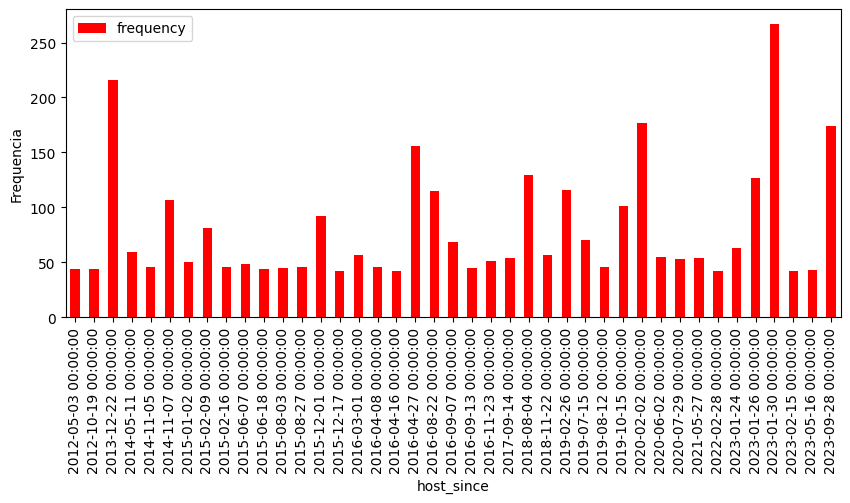

In [257]:
# Convertir el índice a formato de fecha
table5.index = pd.to_datetime(table5.index, format='%Y-%m-%d')

# Ordenar el DataFrame por el índice de fecha
table5 = table5.sort_index()

# Realizar un gráfico de barras para visualizar los datos
table5.plot(kind='bar', color='red', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('host_since')
plt.show()

**Extracción de Caracteristicas de "host_response_time"**

In [258]:
#Obtengo un analisis univariado de la variable categorica room_type
table6 = freq_tbl(Mexico['host_response_time'])
table6 = table6.drop(['percentage', 'cumulative_perc'], axis=1)
table6 = table6.set_index('host_response_time')
table6

frequency
host_response_time           
within an hour          22414
within a few hours       1957
a few days or more       1108
within a day             1103

<Axes: ylabel='frequency'>

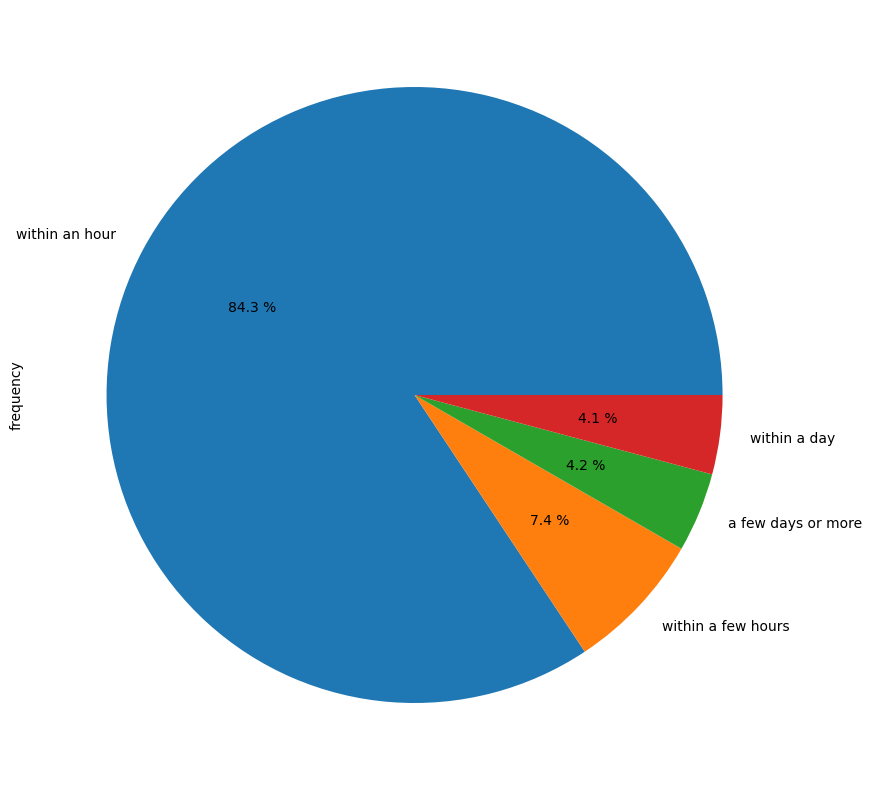

In [259]:
#realizamos grafico de pastel del dataframe filtrado
table6["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "host_response_rate"**

In [260]:
#Obtengo un analisis univariado de la variable categorica room_type
table7 = freq_tbl(Mexico['host_response_rate'])
table7 = table7.drop(['percentage', 'cumulative_perc'], axis=1)
table7 = table7.set_index('host_response_rate')
table7 = table7[table7['frequency'] > 20]
table7

frequency
host_response_rate                       
100%                                17583
No contiene host_response_rate       3622
99%                                  1106
0%                                    567
90%                                   559
98%                                   262
80%                                   234
97%                                   222
96%                                   194
50%                                   173
94%                                   144
93%                                   132
67%                                   123
95%                                   120
4%                                    115
91%                                   113
92%                                    92
88%                                    91
75%                                    83
89%                                    81
86%                                    75
70%                                    70
33%                                    66
83%                                    60
60%                                    58
40%                                    46
30%                                    43
10%                                    37
20%                                    37
87%                                    32
48%                                    28
85%                                    25
71%                                    25
25%                                    23
82%                                    22

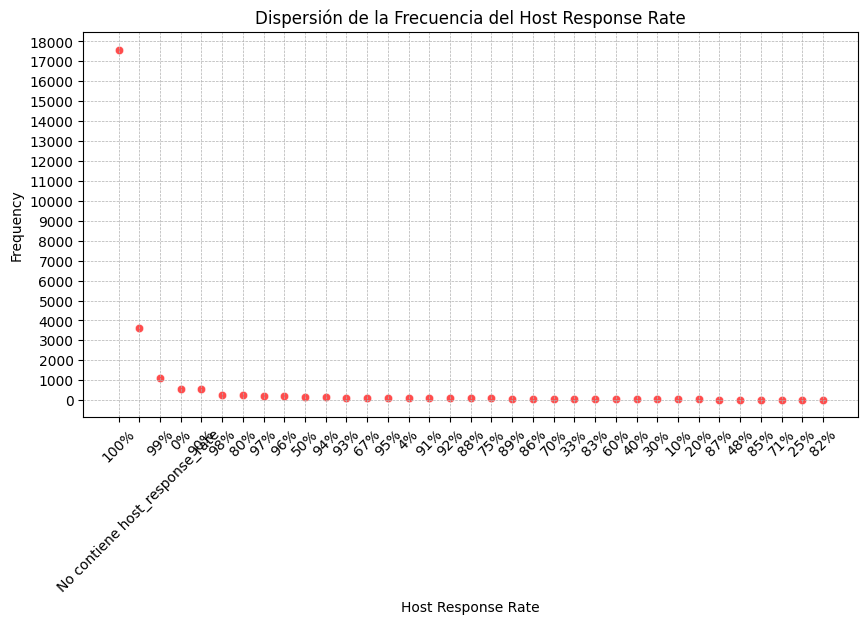

In [261]:
# Crear gráfica de dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x=table7.index, y=table7['frequency'], color='red', alpha=0.7)

# Etiquetas y título
plt.xlabel('Host Response Rate')
plt.ylabel('Frequency')
plt.title('Dispersión de la Frecuencia del Host Response Rate')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

# Ajustar los intervalos del eje Y manualmente
max_freq = table7['frequency'].max()
plt.yticks(np.arange(0, max_freq + 1000, step=1000))  # Intervalos de 1000 (ajusta según necesidad)

plt.grid(True, linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()



**Extracción de Caracteristicas de "host_acceptance_rate"**

In [262]:
#Obtengo un analisis univariado de la variable categorica room_type
table8 = freq_tbl(Mexico['host_acceptance_rate'])
table8 = table8.drop(['percentage', 'cumulative_perc'], axis=1)
table8 = table8[table8['frequency'] > 20]
table8 = table8.set_index('host_acceptance_rate')
table8

frequency
host_acceptance_rate                       
100%                                  10846
99%                                    3339
No contiene host_acceptance_rate       2869
98%                                    1418
97%                                    1095
0%                                      904
96%                                     683
95%                                     331
94%                                     331
93%                                     256
50%                                     255
89%                                     227
91%                                     224
92%                                     222
90%                                     212
67%                                     192
85%                                     180
86%                                     161
75%                                     146
88%                                     146
87%                                     144
30%                                     128
83%                                     123
33%                                     119
77%                                     114
80%                                     109
84%                                     109
71%                                     108
82%                                      97
81%                                      80
78%                                      79
60%                                      64
73%                                      62
74%                                      57
25%                                      50
40%                                      50
72%                                      49
56%                                      49
63%                                      42
31%                                      39
53%                                      39
79%                                      39
43%                                      38
70%                                      37
76%                                      37
64%                                      34
35%                                      33
20%                                      31
57%                                      29
58%                                      28
69%                                      27
68%                                      26
47%                                      25
62%                                      24
61%                                      23
9%                                       23
52%                                      23
17%                                      22

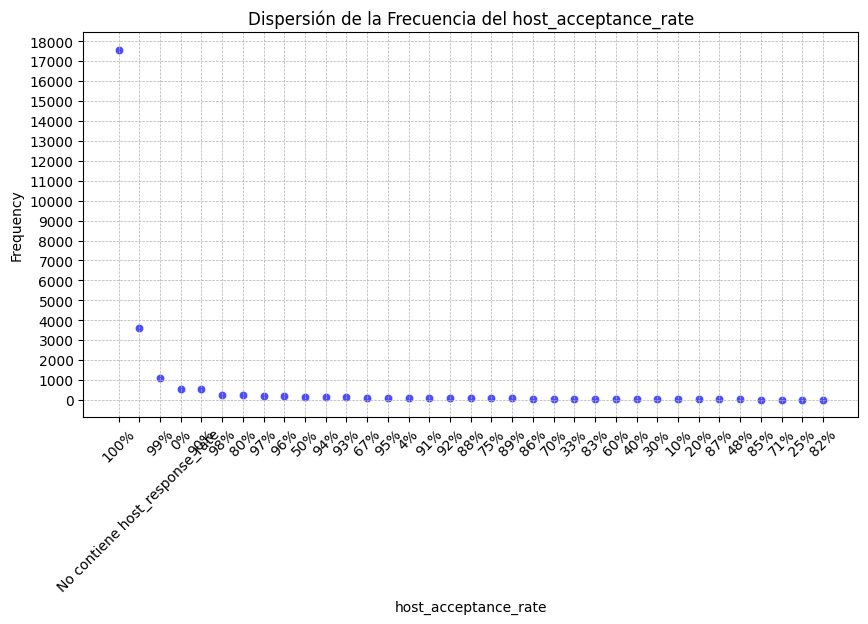

In [263]:
# Crear gráfica de dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x=table7.index, y=table7['frequency'], color='blue', alpha=0.7)

# Etiquetas y título
plt.xlabel('host_acceptance_rate')
plt.ylabel('Frequency')
plt.title('Dispersión de la Frecuencia del host_acceptance_rate')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

# Ajustar los intervalos del eje Y manualmente
max_freq = table7['frequency'].max()
plt.yticks(np.arange(0, max_freq + 1000, step=1000))  # Intervalos de 1000 (ajusta según necesidad)

plt.grid(True, linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()


**Extracción de Caracteristicas de "host_is_superhost"**

In [264]:
#Obtengo un analisis univariado de la variable categorica room_type
table8 = freq_tbl(Mexico['host_is_superhost'])
table8 = table8.drop(['percentage', 'cumulative_perc'], axis=1)
table8 = table8.set_index('host_is_superhost')
table8

frequency
host_is_superhost           
f                      15346
t                      11236

<Axes: ylabel='frequency'>

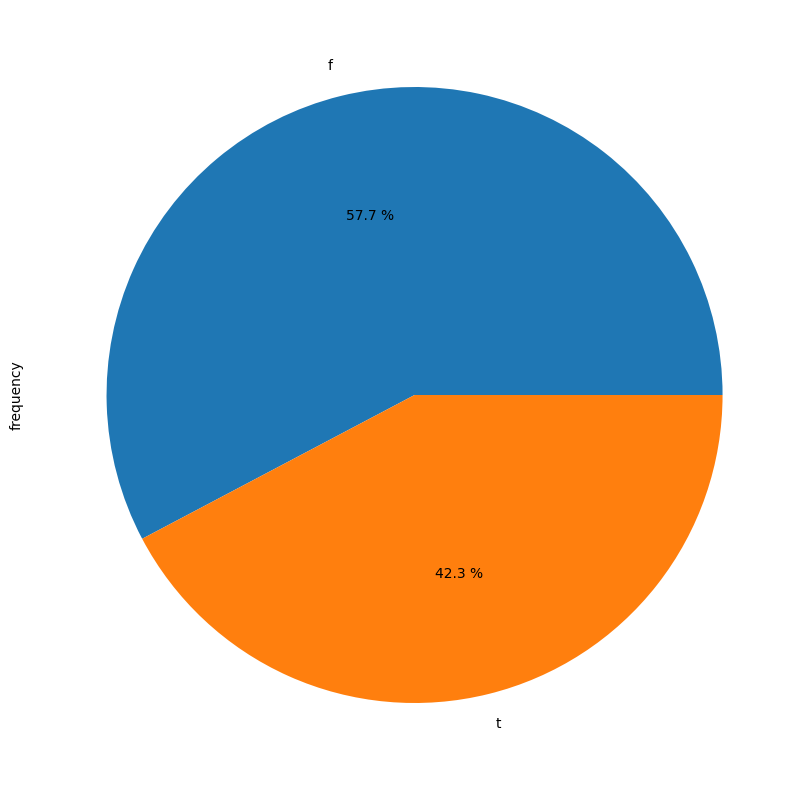

In [265]:
#realizamos grafico de pastel del dataframe filtrado
table8["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "host_verifications"**

In [266]:
#Obtengo un analisis univariado de la variable categorica host_verifications
table9 = freq_tbl(Mexico['host_verifications'])
table9 = table9.drop(['percentage', 'cumulative_perc'], axis=1)
table9 = table9.set_index('host_verifications')
table9

frequency
host_verifications                         
['email', 'phone']                    20504
['email', 'phone', 'work_email']       3381
['phone']                              2527
['phone', 'work_email']                 105
['email']                                33
[]                                       30
['email', 'work_email']                   1
['work_email']                            1

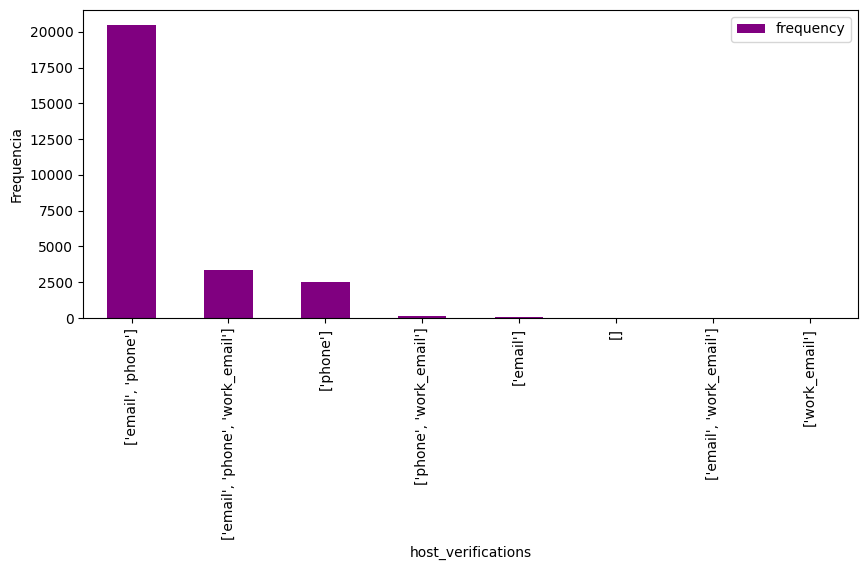

In [267]:
#Realizamos un grafico de barras para visualizar los datos
table9.plot(kind='bar', color='purple', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('host_verifications')
plt.show()

**Extracción de Caracteristicas de "host_identity_verified"**

In [268]:
#Obtengo un analisis univariado de la variable host_identity_verified
table10 = freq_tbl(Mexico['host_identity_verified'])
table10 = table10.drop(['percentage', 'cumulative_perc'], axis=1)
table10 = table10.set_index('host_identity_verified')
table10

frequency
host_identity_verified           
t                           25426
f                            1156

<Axes: ylabel='frequency'>

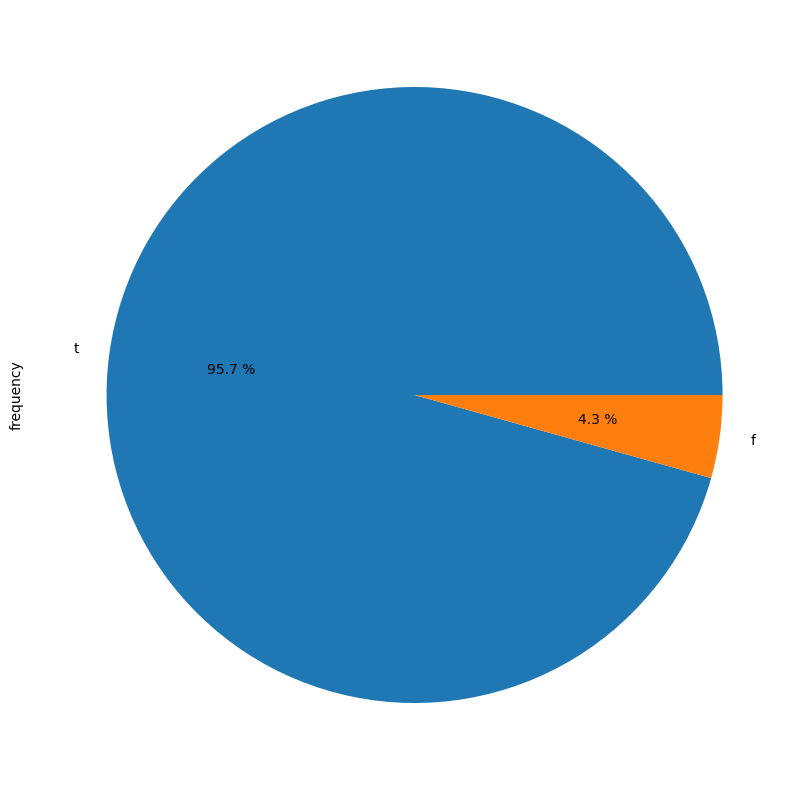

In [269]:
#realizamos grafico de pastel del dataframe filtrado
table10["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "neighbourhood"**

In [270]:
#Obtengo un analisis univariado de la variable categorica neighbourhood
table11 = freq_tbl(Mexico['neighbourhood'])
table11 = table11.drop(['percentage', 'cumulative_perc'], axis=1)
table11 = table11[table11['frequency'] > 5]
table11 = table11.set_index('neighbourhood')
table11

frequency
neighbourhood                                               
Mexico City, Ciudad de México, Mexico                  13066
No Hay                                                 10895
Mexico City, CDMX, Mexico                                584
Mexico City, Distrito Federal, Mexico                    463
Centro, Ciudad de México, Mexico                         227
Mexico City, Federal District, Mexico                    183
Mexico City, Mexico                                      172
Juárez, Ciudad de México, Mexico                         166
Mexico City, D.F., Mexico                                 88
Del Valle Norte, Ciudad de México, Mexico                 43
Colonia Juárez, Ciudad de México, Mexico                  32
Cuauhtémoc, Ciudad de México, Mexico                      27
Mexico City, DF, Mexico                                   24
Ejido del Centro, Ciudad de México, Mexico                20
Hipódromo, Cuauhtémoc, Mexico                             20
De los Deportes, Ciudad de México, Mexico                 17
Mexico City, Ci, Mexico                                   17
Ciudad de México, Mexico                                  15
Benito Juárez, Ciudad de México, Mexico                   13
Juárez, CDMX, Mexico                                       9
CONDESA, CUAUHTEMOC, Mexico                                9
Alcaldía Miguel Hidalgo, Ciudad de México, Mexico          8
Centro, CDMX, Mexico                                       8
Coyoacan, Ciudad de México, Mexico                         7
Mexico City, Xochimilco, Mexico                            7
Ciudad de México , Ciudad de México, Mexico                6
Miguel Hidalgo, Ciudad de México, Mexico                   6
Mexico                                                     6
Mexico City, Cuauhtemoc, Mexico                            6
Colonia Juárez, Distrito Federal, Mexico                   6

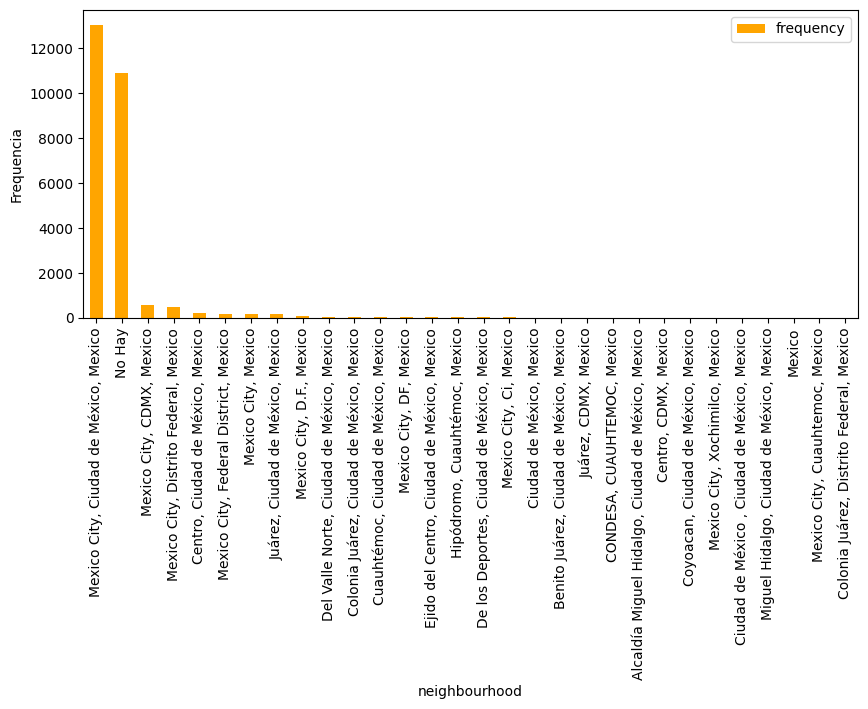

In [271]:
#Realizamos un grafico de barras para visualizar los datos
table11.plot(kind='bar', color='orange', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('neighbourhood')
plt.show()

**Extracción de Caracteristicas de "amenities"**

In [272]:
#Obtengo un analisis univariado de la variable categorica amenities
table12 = freq_tbl(Mexico['amenities'])
table12 = table12.drop(['percentage', 'cumulative_perc'], axis=1)
table12 = table12[table12['frequency'] > 12]
table12 = table12.set_index('amenities')
table12

frequency
amenities                                                    
["Iron", "Elevator", "High chair", "Wifi", "Ref...         71
["Iron", "High chair", "Wifi", "Refrigerator", ...         41
[]                                                         40
["Iron", "Wifi", "Heating", "Self check-in", "H...         29
["Iron", "Elevator", "High chair", "Wifi", "Ref...         25
["TV", "Wifi", "Kitchen"]                                  24
["Washer", "TV", "Wifi", "Kitchen", "Dedicated ...         23
["Iron", "Wifi", "Refrigerator", "Self check-in...         20
["Washer", "TV", "Wifi", "Kitchen"]                        18
["Iron", "TV", "Wifi", "First aid kit", "Privat...         17
["Iron", "Wifi", "Host greets you", "Refrigerat...         17
["Dedicated workspace", "TV", "Wifi", "Kitchen"]           16
["Dryer", "Iron", "Washer", "Carbon monoxide al...         15
["Free parking on premises", "Iron", "Cleaning ...         15
["Wifi", "Kitchen"]                                        14
["Iron", "Washer", "Wifi", "Refrigerator", "Dis...         14
["Wifi", "Paid washer \u2013 In building", "Dis...         13

<Axes: ylabel='frequency'>

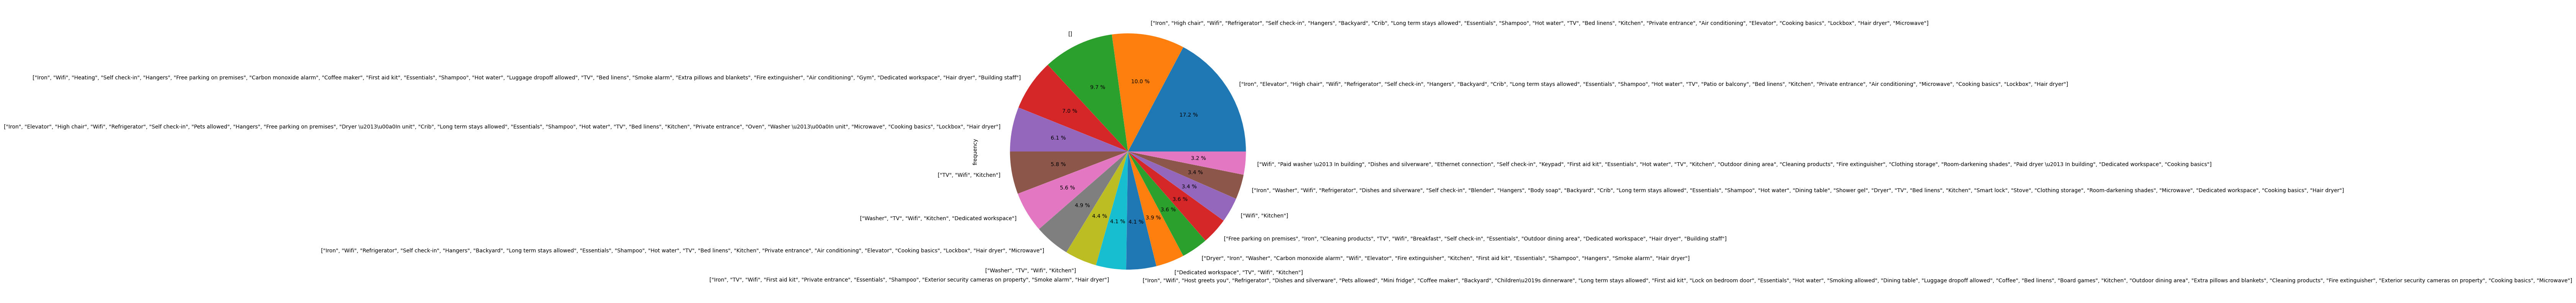

In [273]:
#realizamos grafico de pastel del dataframe filtrado
table12["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "has_availability"**

In [274]:
#Obtengo un analisis univariado de la variable categorica has_availability
table13 = freq_tbl(Mexico['has_availability'])
table13 = table13.drop(['percentage', 'cumulative_perc'], axis=1)
table13 = table13.set_index('has_availability')
table13

frequency
has_availability           
t                     25533
f                      1049

<Axes: ylabel='frequency'>

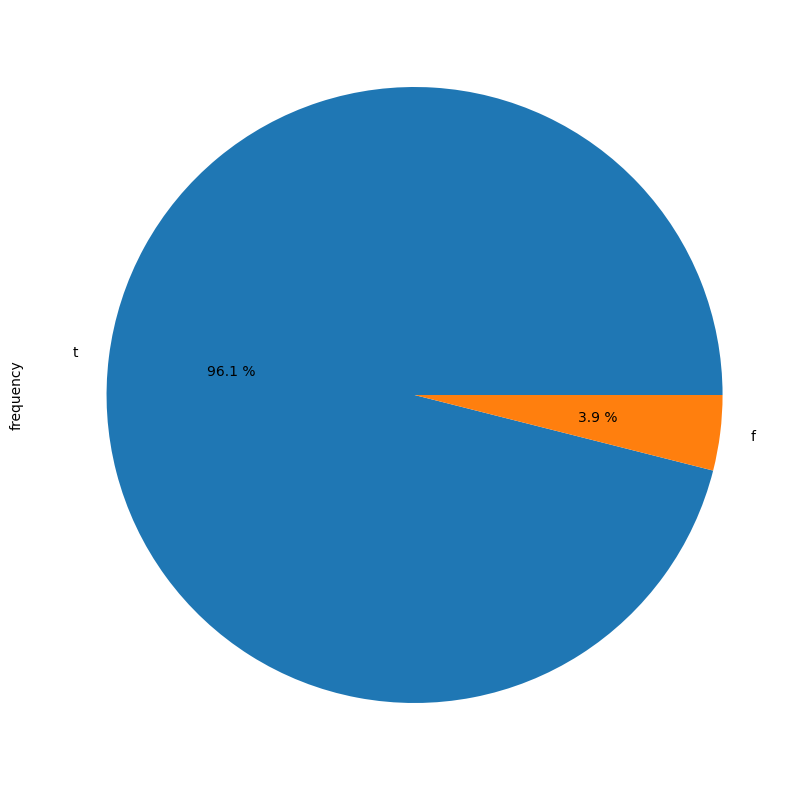

In [275]:
#realizamos grafico de pastel del dataframe filtrado
table13["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "calendar_last_scraped"**

In [276]:
#Obtengo un analisis univariado de la variable categorica calendar_last_scraped
table14 = freq_tbl(Mexico['calendar_last_scraped'])
table14 = table14.drop(['percentage', 'cumulative_perc'], axis=1)
table14 = table14.set_index('calendar_last_scraped')
table14

frequency
calendar_last_scraped           
2024-09-25                 15757
2024-09-26                 10825

<Axes: ylabel='frequency'>

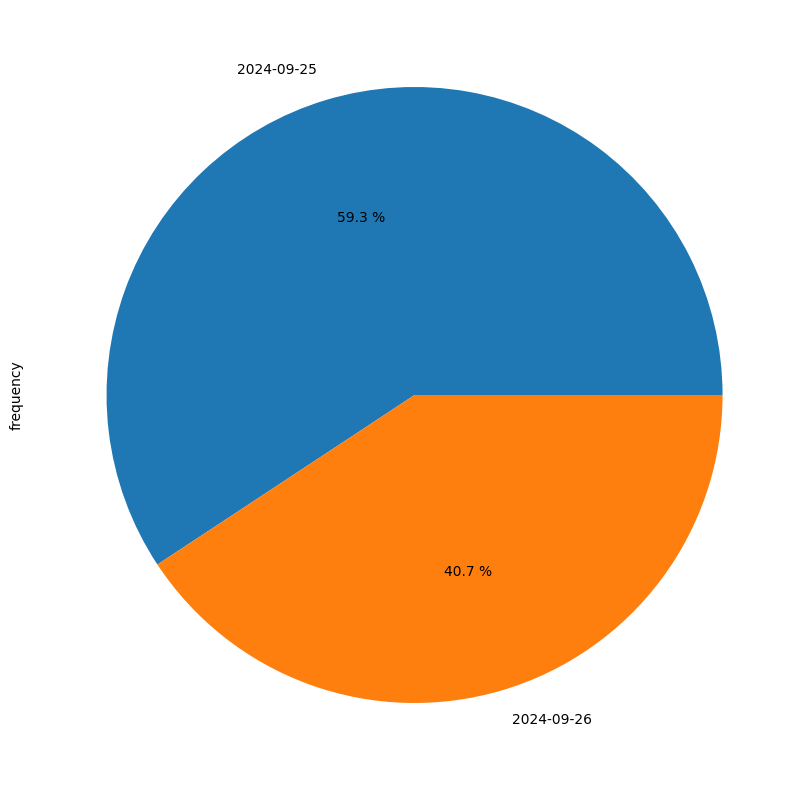

In [277]:
#realizamos grafico de pastel del dataframe filtrado
table14["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "first_review"**

In [278]:
#Obtengo un analisis univariado de la variable categorica first_review
table16 = freq_tbl(Mexico['first_review'])
table16 = table16.drop(['percentage', 'cumulative_perc'], axis=1)
table16 = table16[table16['frequency'] > 50]
table16 = table16.set_index('first_review')
table16

frequency
first_review           
2024-09-16          141
2024-09-22          137
2023-08-27          121
2022-10-31          118
2024-06-30          112
2024-08-11           92
2023-10-29           89
2023-10-30           87
2024-09-08           87
2024-05-19           78
2024-09-15           77
2024-07-14           72
2022-10-30           72
2024-02-26           71
2024-09-01           67
2024-02-04           64
2024-02-25           64
2022-11-21           63
2024-08-25           60
2024-04-21           58
2024-09-21           58
2024-09-17           57
2023-11-05           57
2024-07-01           55
2023-10-31           55
2023-08-26           54
2023-06-25           53
2022-06-26           51

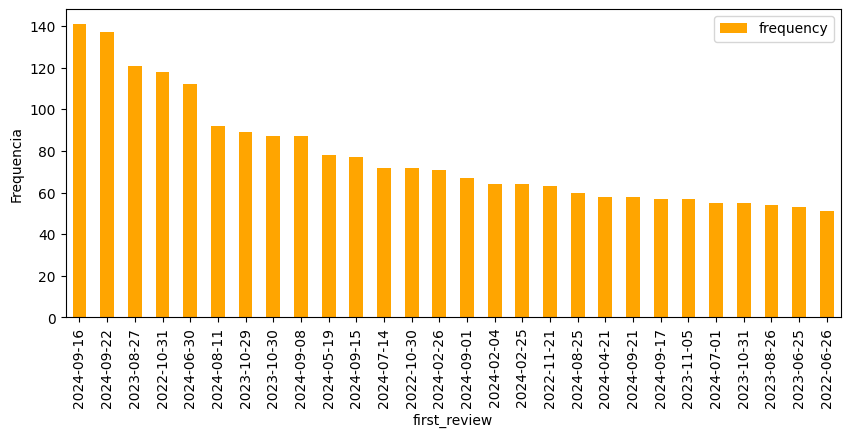

In [279]:
#Realizamos un grafico de barras para visualizar los datos
table16.plot(kind='bar', color='orange', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('first_review')
plt.show()

**Extracción de Caracteristicas de "last_review"**

In [280]:
#Obtengo un analisis univariado de la variable categorica last_review
table17 = freq_tbl(Mexico['last_review'])
table17 = table17.drop(['percentage', 'cumulative_perc'], axis=1)
table17 = table17[table17['frequency'] > 50]
table17 = table17.set_index('last_review')
table17

frequency
last_review           
2024-09-22        1407
2024-09-16        1269
2024-09-23        1088
2024-09-17         857
2024-09-08         796
...                ...
2024-05-27          57
2024-05-31          55
2024-07-30          55
2024-08-02          53
2024-08-14          52

[78 rows x 1 columns]

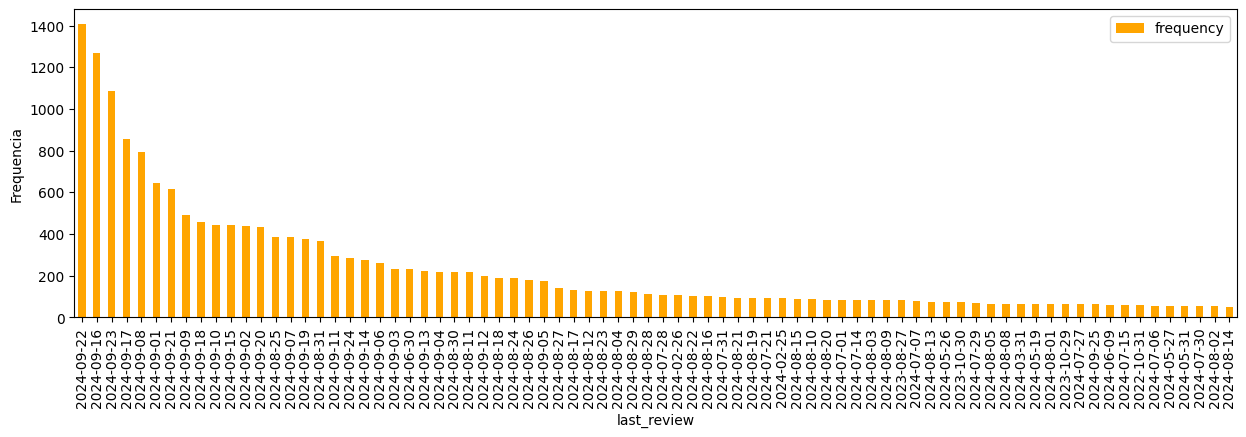

In [281]:
#Realizamos un grafico de barras para visualizar los datos
table17.plot(kind='bar', color='orange', width=0.5, figsize=(15, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_review')
plt.show()

**Extracción de Caracteristicas de "license"**

In [282]:
#Obtengo un analisis univariado de la variable categorica icense
table18 = freq_tbl(Mexico['license'])
table18 = table18.drop(['percentage', 'cumulative_perc'], axis=1)
table18 = table18[table18['frequency'] > 50]
table18 = table18.set_index('license')
table18

frequency
license                          
No cuenta con licencia      26582

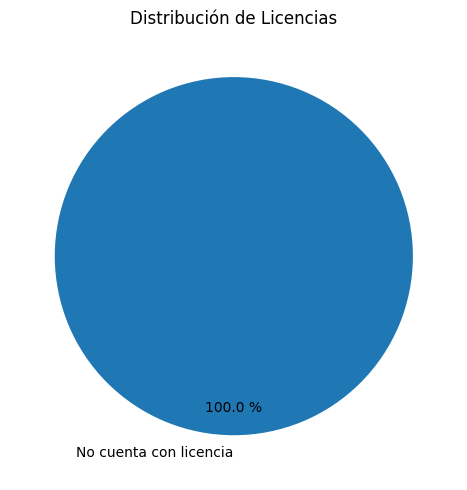

In [283]:
# Crear la figura y el gráfico de pastel
plt.figure(figsize=(5, 5))
table18["frequency"].plot(kind='pie', autopct='%0.1f %%', startangle=90, pctdistance=0.85)
# Agregar un título
plt.title("Distribución de Licencias")
# Ajustar el texto de las etiquetas
plt.ylabel('')  # Elimina el label automático
plt.tight_layout()  # Ajusta el diseño para evitar sobreposición

# Mostrar la gráfica
plt.show()


**Extracción de Caracteristicas de "instant_bookable"**

In [284]:
#Obtengo un analisis univariado de la variable categorica instant_bookable
table19 = freq_tbl(Mexico['instant_bookable'])
table19 = table19.drop(['percentage', 'cumulative_perc'], axis=1)
table19 = table19[table19['frequency'] > 50]
table19 = table19.set_index('instant_bookable')
table19

frequency
instant_bookable           
f                     16080
t                     10502

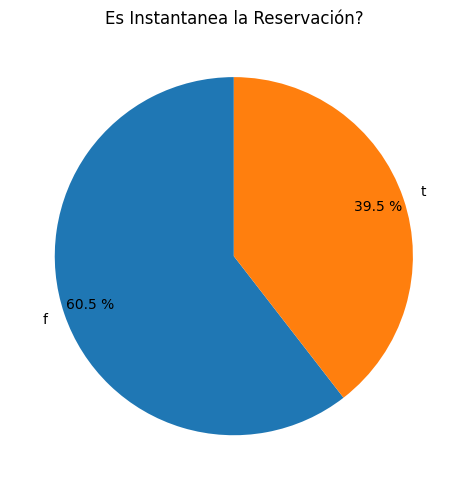

In [285]:
# Crear la figura y el gráfico de pastel
plt.figure(figsize=(5, 5))
table19["frequency"].plot(kind='pie', autopct='%0.1f %%', startangle=90, pctdistance=0.85)
# Agregar un título
plt.title("Es Instantanea la Reservación?")
# Ajustar el texto de las etiquetas
plt.ylabel('')  # Elimina el label automático
plt.tight_layout()  # Ajusta el diseño para evitar sobreposición

# Mostrar la gráfica
plt.show()

In [286]:
# Lista de columnas a verificar
columns_to_check = [
    "host_response_rate", "host_acceptance_rate", "host_total_listings_count", 
    "accommodates", "bathrooms_text", "beds", "price", "maximum_nights_avg_ntm", 
    "availability_365", "number_of_reviews", "review_scores_location", 
    "review_scores_value", "reviews_per_month", "review_scores_communication", 
    "review_scores_checkin", "review_scores_cleanliness", "review_scores_accuracy"
]

# Verificar si las columnas están presentes en el DataFrame
missing_columns = [col for col in columns_to_check if col not in Mexico.columns]

if not missing_columns:
    print("Todas las columnas están presentes en el archivo CSV.")
else:
    print("Las siguientes columnas no están presentes en el archivo CSV:")
    print(missing_columns)

Las siguientes columnas no están presentes en el archivo CSV:
['bathrooms_text', 'maximum_nights_avg_ntm', 'review_scores_value']


**Categorización de la variable number_of_reviews**

In [287]:
#Calculamos el numerto total de la poblacion n
Mexico['number_of_reviews'].info()
n = 26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [288]:
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['number_of_reviews'].min()
Max_reviews = Mexico['number_of_reviews'].max()
Limites = [Min_reviews, Max_reviews]
Limites

[0.0, 135.0]

In [289]:
#Calculamos el rango R
R = Max_reviews - Min_reviews
R

135.0

In [290]:
#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
ni

15.689631010177528

In [291]:
# Ancho del intervalo
i = R / ni
i

8.60440885527699

In [292]:

# 2. Crear intervalos usando np.linspace()
intervalos_reviews = np.linspace(Min_reviews, Max_reviews, 16)  # 16 puntos generan 15 intervalos

# 3. Definir categorías (una por intervalo, debe haber 15 categorías)
categorias_reviews = [
    'Casi sin reseñas', 'Muy pocas reseñas', 'Pocas reseñas', 'Algunas reseñas', 
    'Reseñas moderadas', 'Varias reseñas', 'Considerables reseñas', 'Muchas reseñas', 
    'Bastantes reseñas', 'Numerosas reseñas', 'Reseñas frecuentes', 'Alta cantidad de reseñas', 
    'Muy alta cantidad de reseñas', 'Reseñas masivas', 'Demasiadas reseñas'
]  # Ahora hay 15 categorías

# 4. Asignar categorías a la columna 'number_of_reviews'
Mexico['number_of_reviews'] = pd.cut(
    x=Mexico['number_of_reviews'], 
    bins=intervalos_reviews, 
    labels=categorias_reviews
)

# 5. Ver los resultados
Mexico['number_of_reviews'].value_counts()



number_of_reviews
Casi sin reseñas                7242
Algunas reseñas                 3901
Muy pocas reseñas               3017
Pocas reseñas                   2025
Reseñas moderadas               1239
Varias reseñas                   994
Considerables reseñas            880
Muchas reseñas                   729
Bastantes reseñas                581
Numerosas reseñas                548
Reseñas frecuentes               454
Alta cantidad de reseñas         397
Muy alta cantidad de reseñas     318
Reseñas masivas                  308
Demasiadas reseñas               293
Name: count, dtype: int64

In [293]:
#Obtengo un analisis univariado de la variable categorica number_of_reviews
table1 = freq_tbl(Mexico['number_of_reviews'])
table1 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table1 = table1[table1['frequency'] > 50]
table1 = table1.set_index('number_of_reviews')
table1

frequency
number_of_reviews                      
Casi sin reseñas                   7242
Algunas reseñas                    3901
Muy pocas reseñas                  3017
Pocas reseñas                      2025
Reseñas moderadas                  1239
Varias reseñas                      994
Considerables reseñas               880
Muchas reseñas                      729
Bastantes reseñas                   581
Numerosas reseñas                   548
Reseñas frecuentes                  454
Alta cantidad de reseñas            397
Muy alta cantidad de reseñas        318
Reseñas masivas                     308
Demasiadas reseñas                  293

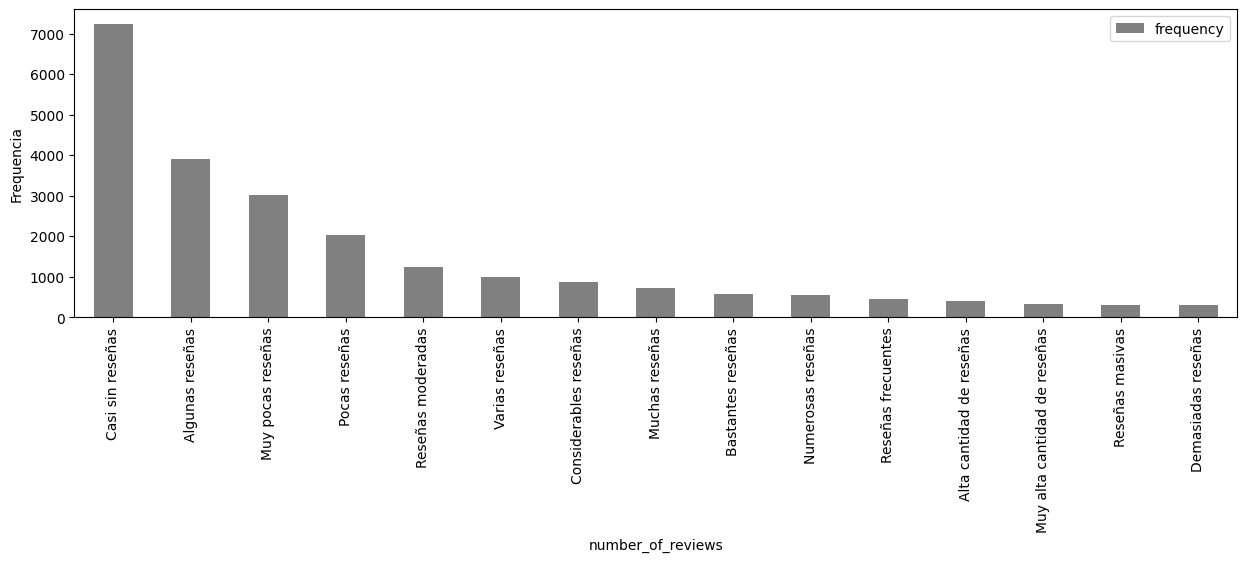

In [294]:
#Realizamos un grafico de barras para visualizar los datos
table1.plot(kind='bar', color='grey', width=0.5, figsize=(15, 4))
plt.ylabel('Frequencia')
plt.xlabel('number_of_reviews')
plt.show()

**Categorización de la variable review_scores_location**

In [295]:
#Calculamos el numerto total de la poblacion n
Mexico['review_scores_location'].info()
n = 26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [296]:
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_location'].min()
Max_reviews = Mexico['review_scores_location'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.75, 5.0]
R:  0.25
ni:  15.689631010177528
i:  0.01593409047273517


In [297]:
# Definir intervalos manualmente
bins = [0, 1, 2, 3, 4, 5]
labels = ['Muy bajo', 'Bajo', 'Regular', 'Bueno', 'Excelente']

# Aplicar pd.cut()
Mexico['review_scores_location'] = pd.cut(Mexico['review_scores_location'], bins=bins, labels=labels)

# Ver resultados
print(Mexico['review_scores_location'].value_counts())



review_scores_location
Excelente    26582
Muy bajo         0
Bajo             0
Regular          0
Bueno            0
Name: count, dtype: int64


In [298]:
#Obtengo un analisis univariado de la variable categorica review_scores_location
table2 = freq_tbl(Mexico['review_scores_location'])
table2 = table2.drop(['percentage', 'cumulative_perc'], axis=1)
table2 = table2.set_index('review_scores_location')
table2

frequency
review_scores_location           
Excelente                   26582
Muy bajo                        0
Bajo                            0
Regular                         0
Bueno                           0

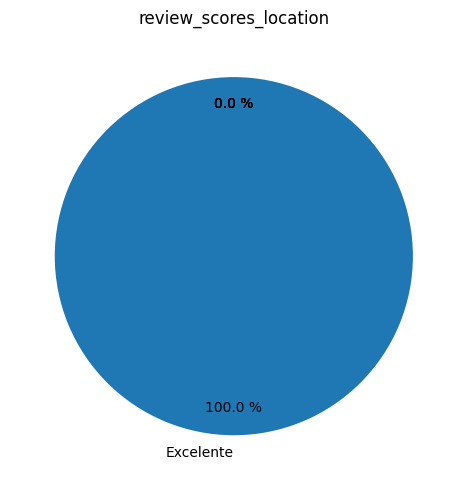

In [299]:
# Crear la figura y el gráfico de pastel
plt.figure(figsize=(5, 5))
table2["frequency"].plot(kind='pie', autopct='%0.1f %%', startangle=90, pctdistance=0.85)
# Agregar un título
plt.title("review_scores_location")
# Ajustar el texto de las etiquetas
plt.ylabel('')  # Elimina el label automático
plt.tight_layout()  # Ajusta el diseño para evitar sobreposición

# Mostrar la gráfica
plt.show()

**Categorización de la variable reviews_per_month**

In [300]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['reviews_per_month'].min()
Max_reviews = Mexico['reviews_per_month'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [0.01, 4.72]
R:  4.71
ni:  15.689631010177528
i:  0.3001982645063306


In [301]:
# Definir intervalos manualmente
bins = [0, 1, 2, 3, 4, 5]  # Definir cortes para cada categoría
labels = ['Muy bajo', 'Bajo', 'Regular', 'Bueno', 'Excelente']

# Asignar categorías a 'reviews_per_month'
Mexico['reviews_per_month'] = pd.cut(Mexico['reviews_per_month'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['reviews_per_month'].value_counts())


reviews_per_month
Muy bajo     10599
Bajo         10073
Regular       3210
Bueno         1917
Excelente      783
Name: count, dtype: int64


In [302]:
#Obtengo un analisis univariado de la variable categorica reviews_per_month
table3 = freq_tbl(Mexico['reviews_per_month'])
table3 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
table3 = table3.set_index('reviews_per_month')
table3

frequency
reviews_per_month           
Muy bajo               10599
Bajo                   10073
Regular                 3210
Bueno                   1917
Excelente                783

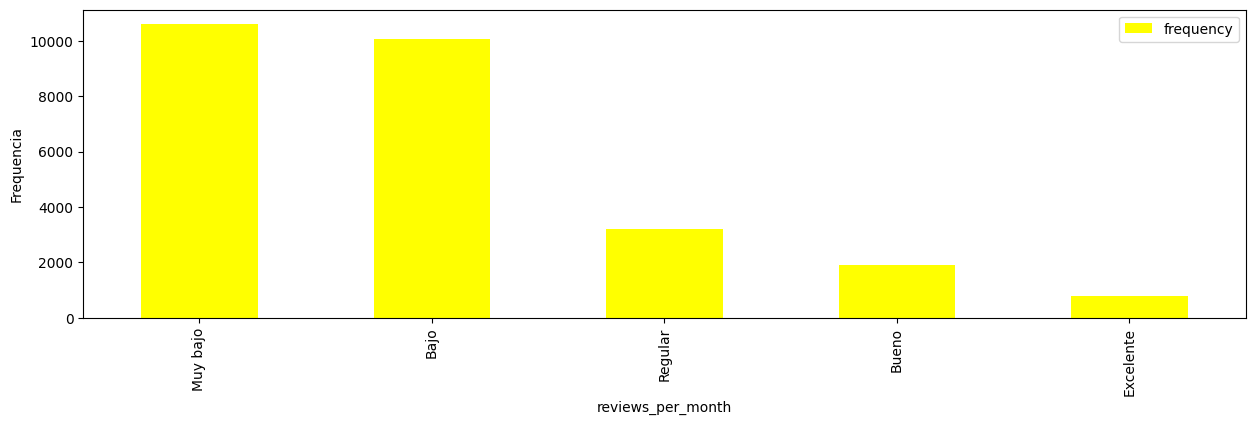

In [303]:
#Realizamos un grafico de barras para visualizar los datos
table3.plot(kind='bar', color='yellow', width=0.5, figsize=(15, 4))
plt.ylabel('Frequencia')
plt.xlabel('reviews_per_month')
plt.show()

**Categorización de la variable "review_scores_communication"**

In [304]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_communication'].min()
Max_reviews = Mexico['review_scores_communication'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.75, 5.0]
R:  0.25
ni:  15.689631010177528
i:  0.01593409047273517


In [305]:
# Definir intervalos manualmente
bins = [4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['Alto', 'Muy alto', 'Excepcional']

# Asignar categorías a 'review_scores_communication'
Mexico['review_scores_communication'] = pd.cut(Mexico['review_scores_communication'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_communication'].value_counts())

review_scores_communication
Excepcional    16852
Muy alto        8084
Alto            1646
Name: count, dtype: int64


In [306]:
#Obtengo un analisis univariado de la variable categorica review_scores_communication
table4 = freq_tbl(Mexico['review_scores_communication'])
table4 = table4.drop(['percentage', 'cumulative_perc'], axis=1)
table4 = table4.set_index('review_scores_communication')
table4

frequency
review_scores_communication           
Excepcional                      16852
Muy alto                          8084
Alto                              1646

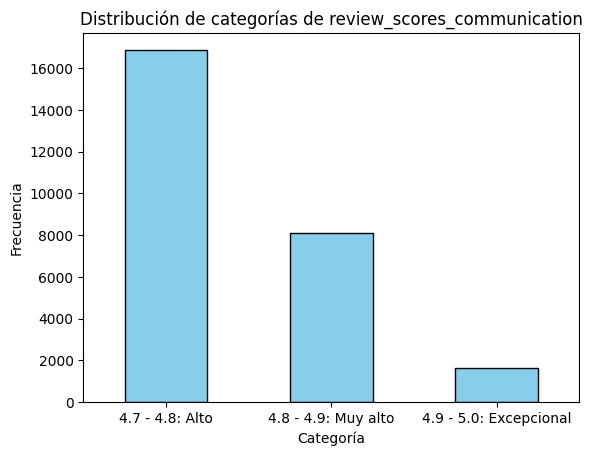

In [307]:
# Crear etiquetas personalizadas para el eje X
etiquetas_personalizadas = ['4.7 - 4.8: Alto', '4.8 - 4.9: Muy alto', '4.9 - 5.0: Excepcional']

# Gráfico de barras
table4.plot(kind='bar', color='skyblue', edgecolor='black', legend=False)
plt.title('Distribución de categorías de review_scores_communication')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(range(len(etiquetas_personalizadas)), etiquetas_personalizadas, rotation=0)  # Personalizar etiquetas
plt.show()

**Categorización de la variable "review_scores_checkin"**

In [308]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_checkin'].min()
Max_reviews = Mexico['review_scores_checkin'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.76, 5.0]
R:  0.2400000000000002
ni:  15.689631010177528
i:  0.015296726853825774


In [309]:
# Definir intervalos manualmente
bins = [4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['Alto', 'Muy alto', 'Excepcional']

# Asignar categorías a 'review_scores_checkin'
Mexico['review_scores_checkin'] = pd.cut(Mexico['review_scores_checkin'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_checkin'].value_counts())

review_scores_checkin
Excepcional    16765
Muy alto        8456
Alto            1361
Name: count, dtype: int64


In [310]:
#Obtengo un analisis univariado de la variable categorica review_scores_checkin
table5 = freq_tbl(Mexico['review_scores_checkin'])
table5 = table5.drop(['percentage', 'cumulative_perc'], axis=1)
table5 = table5.set_index('review_scores_checkin')
table5

frequency
review_scores_checkin           
Excepcional                16765
Muy alto                    8456
Alto                        1361

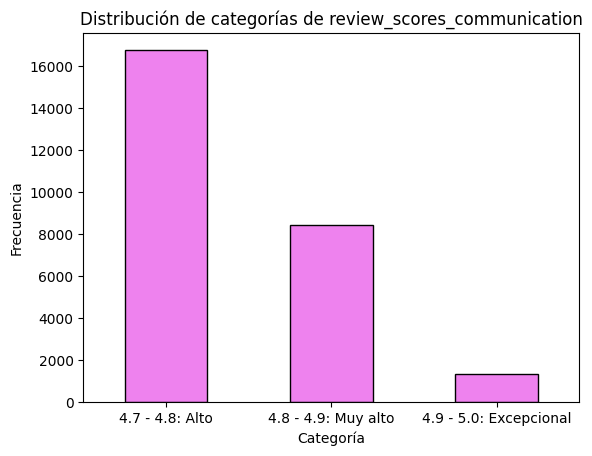

In [311]:
# Crear etiquetas personalizadas para el eje X
etiquetas_personalizadas = ['4.7 - 4.8: Alto', '4.8 - 4.9: Muy alto', '4.9 - 5.0: Excepcional']

# Gráfico de barras
table5.plot(kind='bar', color='violet', edgecolor='black', legend=False)
plt.title('Distribución de categorías de review_scores_communication')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(range(len(etiquetas_personalizadas)), etiquetas_personalizadas, rotation=0)  # Personalizar etiquetas
plt.show()

**Categorización de la variable "review_scores_cleanliness"**

In [312]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_cleanliness'].min()
Max_reviews = Mexico['review_scores_cleanliness'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.64, 5.0]
R:  0.3600000000000003
ni:  15.689631010177528
i:  0.022945090280738663


In [313]:
# Definir intervalos manualmente
bins = [4.6, 4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['4.6 - 4.7: Bajo', '4.7 - 4.8: Medio', '4.8 - 4.9: Alto', '4.9 - 5.0: Excepcional']

# Asignar categorías a 'review_scores_cleanliness'
Mexico['review_scores_cleanliness'] = pd.cut(Mexico['review_scores_cleanliness'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_cleanliness'].value_counts())

review_scores_cleanliness
4.8 - 4.9: Alto           9199
4.9 - 5.0: Excepcional    8775
4.7 - 4.8: Medio          7080
4.6 - 4.7: Bajo           1528
Name: count, dtype: int64


In [314]:
#Obtengo un analisis univariado de la variable categorica review_scores_cleanliness
table6 = freq_tbl(Mexico['review_scores_cleanliness'])
table6 = table6.drop(['percentage', 'cumulative_perc'], axis=1)
table6 = table6.set_index('review_scores_cleanliness')
table6

frequency
review_scores_cleanliness           
4.8 - 4.9: Alto                 9199
4.9 - 5.0: Excepcional          8775
4.7 - 4.8: Medio                7080
4.6 - 4.7: Bajo                 1528

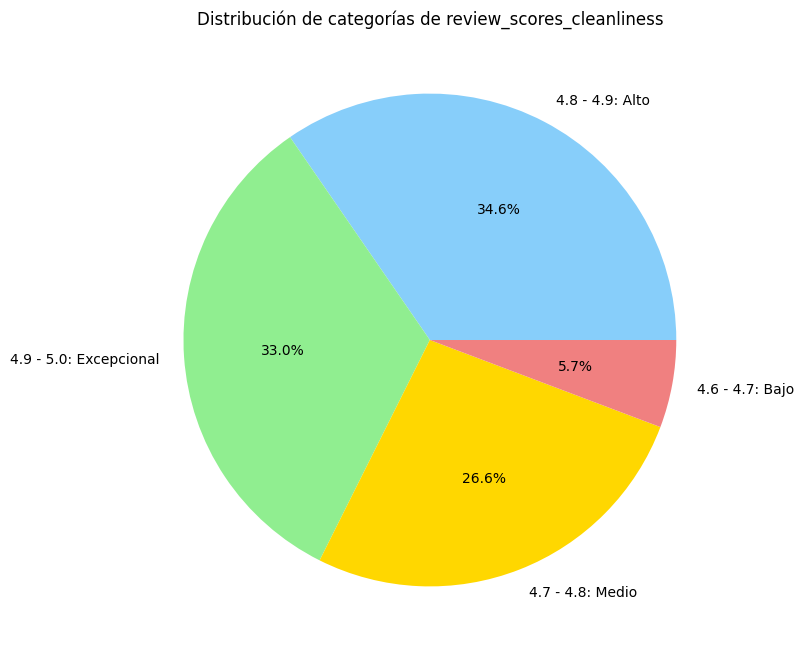

In [315]:
# Datos de la tabla table6
frecuencias = table6['frequency']
etiquetas = table6.index  # Las etiquetas ya están en el índice de la tabla

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencias, labels=etiquetas, autopct='%1.1f%%', colors=['lightskyblue', 'lightgreen', 'gold', 'lightcoral'])
plt.title('Distribución de categorías de review_scores_cleanliness')
plt.show()

**Categorización de la variable "review_scores_accuracy"**

In [316]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_accuracy'].min()
Max_reviews = Mexico['review_scores_accuracy'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.69, 5.0]
R:  0.3099999999999996
ni:  15.689631010177528
i:  0.019758272186191583


In [317]:
# Definir intervalos manualmente
bins = [4.6, 4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['4.6 - 4.7: Bajo', '4.7 - 4.8: Medio', '4.8 - 4.9: Alto', '4.9 - 5.0: Excepcional']

# Asignar categorías a 'review_scores_accuracy'
Mexico['review_scores_accuracy'] = pd.cut(Mexico['review_scores_accuracy'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_accuracy'].value_counts())

review_scores_accuracy
4.9 - 5.0: Excepcional    10028
4.8 - 4.9: Alto            9456
4.7 - 4.8: Medio           6762
4.6 - 4.7: Bajo             336
Name: count, dtype: int64


In [318]:
#Obtengo un analisis univariado de la variable categorica review_scores_accuracy
table7 = freq_tbl(Mexico['review_scores_accuracy'])
table7 = table7.drop(['percentage', 'cumulative_perc'], axis=1)
table7 = table7.set_index('review_scores_accuracy')
table7

frequency
review_scores_accuracy           
4.9 - 5.0: Excepcional      10028
4.8 - 4.9: Alto              9456
4.7 - 4.8: Medio             6762
4.6 - 4.7: Bajo               336

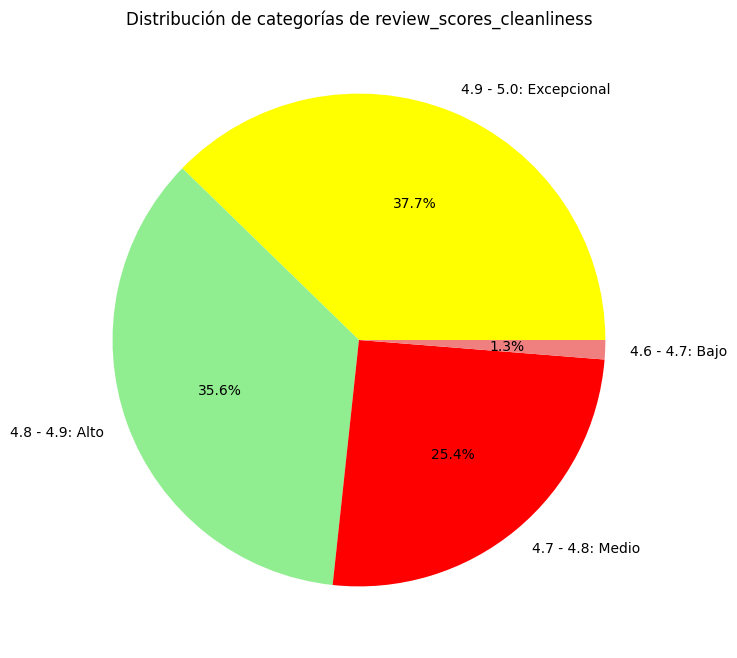

In [319]:
# Datos de la tabla table6
frecuencias = table7['frequency']
etiquetas = table7.index  # Las etiquetas ya están en el índice de la tabla

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencias, labels=etiquetas, autopct='%1.1f%%', colors=['yellow', 'lightgreen', 'red', 'lightcoral'])
plt.title('Distribución de categorías de review_scores_cleanliness')
plt.show()

**Categorización de la variable "host_response_rate"**

In [320]:
Mexico['host_response_rate'] = Mexico['host_response_rate'].replace('No contiene host_response_rate', '0%')
Mexico['host_response_rate'] = Mexico['host_response_rate'].str.rstrip('%').astype(float)


In [321]:
n = 26582
# 1. Obtener valores mínimo y máximo
min_host_response_rate = Mexico['host_response_rate'].min()
max_host_response_rate = Mexico['host_response_rate'].max()
Limites = [min_host_response_rate, max_host_response_rate]
print("Limites: ",Limites)

#Calculamos el rango R
R = max_host_response_rate - min_host_response_rate
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [0.0, 100.0]
R:  100.0
ni:  15.689631010177528
i:  6.373636189094067


In [322]:
#Categorización de variables
intervalos = np.linspace(min_host_response_rate, max_host_response_rate, 17)
intervalos

array([  0.  ,   6.25,  12.5 ,  18.75,  25.  ,  31.25,  37.5 ,  43.75,
        50.  ,  56.25,  62.5 ,  68.75,  75.  ,  81.25,  87.5 ,  93.75,
       100.  ])

In [323]:
# Definir las etiquetas
labels = [0.0, 6.66666667, 13.33333333, 20.0, 26.66666667, 33.33333333, 40.0, 46.66666667, 53.33333333, 60.0, 66.66666667, 73.33333333, 80.0, 86.66666667, 93.33333333, 100.0]

In [324]:
#Finalmente creamos las categorias en la columna numerica
Mexico['host_response_rate'] = pd.cut(x= Mexico['host_response_rate'], bins=intervalos, labels=labels)
Mexico['host_response_rate']

0               NaN
1        100.000000
2         73.333333
3        100.000000
4        100.000000
            ...    
26577    100.000000
26578    100.000000
26579    100.000000
26580    100.000000
26581    100.000000
Name: host_response_rate, Length: 26582, dtype: category
Categories (16, float64): [0.000000 < 6.666667 < 13.333333 < 20.000000 ... 80.000000 < 86.666667 < 93.333333 < 100.000000]

In [325]:
#Obtengo un analisis univariado de la variable categorica host_response_rate
table8 = freq_tbl(Mexico['host_response_rate'])
table8 = table8.drop(['percentage', 'cumulative_perc'], axis=1)
table8 = table8.set_index('host_response_rate')
table8

frequency
host_response_rate           
100.000000              19631
93.333333                1068
80.000000                 291
86.666667                 219
46.666667                 218
73.333333                 200
66.666667                 143
0.000000                  116
60.000000                 106
20.000000                  83
40.000000                  72
33.333333                  68
6.666667                   58
26.666667                  58
13.333333                  40
53.333333                  22

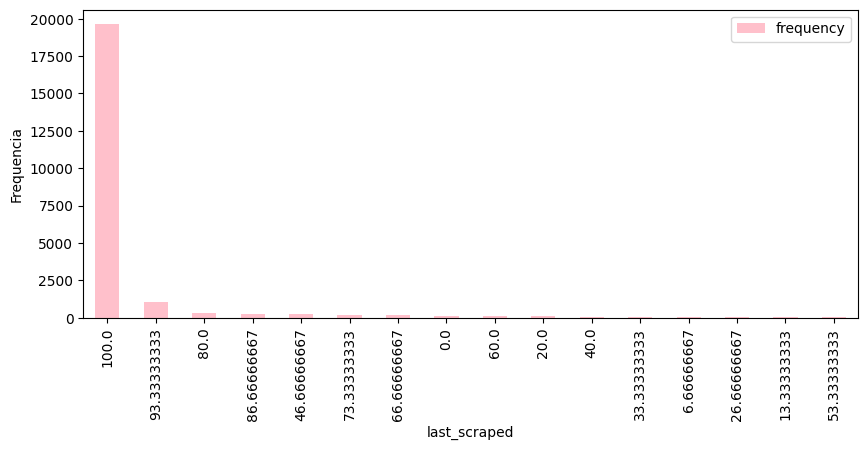

In [326]:
#Realizamos un grafico de barras para visualizar los datos
table8.plot(kind='bar', color='pink', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_scraped')
plt.show()

**Categorización de la variable "“host_acceptance_rate”"**

In [327]:
Mexico['host_acceptance_rate'] = Mexico['host_acceptance_rate'].replace('No contiene host_acceptance_rate', '0%')
Mexico['host_acceptance_rate'] = Mexico['host_acceptance_rate'].str.rstrip('%').astype(float)


In [328]:
n = 26582
# 1. Obtener valores mínimo y máximo
min_host_acceptance_rate = Mexico['host_acceptance_rate'].min()
max_host_acceptance_rate = Mexico['host_acceptance_rate'].max()
Limites = [min_host_acceptance_rate, max_host_acceptance_rate]
print("Limites: ",Limites)

#Calculamos el rango R
R = max_host_acceptance_rate - min_host_acceptance_rate
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [0.0, 100.0]
R:  100.0
ni:  15.689631010177528
i:  6.373636189094067


In [329]:
#Categorización de variables
intervalos = np.linspace(min_host_acceptance_rate, max_host_acceptance_rate, 17)
intervalos

array([  0.  ,   6.25,  12.5 ,  18.75,  25.  ,  31.25,  37.5 ,  43.75,
        50.  ,  56.25,  62.5 ,  68.75,  75.  ,  81.25,  87.5 ,  93.75,
       100.  ])

In [330]:
# Definir las etiquetas
labels = [0.0, 6.66666667, 13.33333333, 20.0, 26.66666667, 33.33333333, 40.0, 46.66666667, 53.33333333, 60.0, 66.66666667, 73.33333333, 80.0, 86.66666667, 93.33333333, 100.0]

In [331]:
#Finalmente creamos las categorias en la columna numerica
Mexico['host_acceptance_rate'] = pd.cut(x= Mexico['host_acceptance_rate'], bins=intervalos, labels=labels)
Mexico['host_acceptance_rate']

0               NaN
1         93.333333
2         60.000000
3        100.000000
4        100.000000
            ...    
26577    100.000000
26578    100.000000
26579    100.000000
26580    100.000000
26581    100.000000
Name: host_acceptance_rate, Length: 26582, dtype: category
Categories (16, float64): [0.000000 < 6.666667 < 13.333333 < 20.000000 ... 80.000000 < 86.666667 < 93.333333 < 100.000000]

In [332]:
#Obtengo un analisis univariado de la variable categorica host_acceptance_rate
table9 = freq_tbl(Mexico['host_acceptance_rate'])
table9 = table9.drop(['percentage', 'cumulative_perc'], axis=1)
table9 = table9.set_index('host_acceptance_rate')
table9

frequency
host_acceptance_rate           
100.000000                18043
93.333333                  1287
86.666667                   814
73.333333                   486
80.000000                   458
46.666667                   336
66.666667                   319
26.666667                   200
33.333333                   186
60.000000                   182
53.333333                   128
20.000000                   126
40.000000                   111
13.333333                    67
6.666667                     50
0.000000                     16

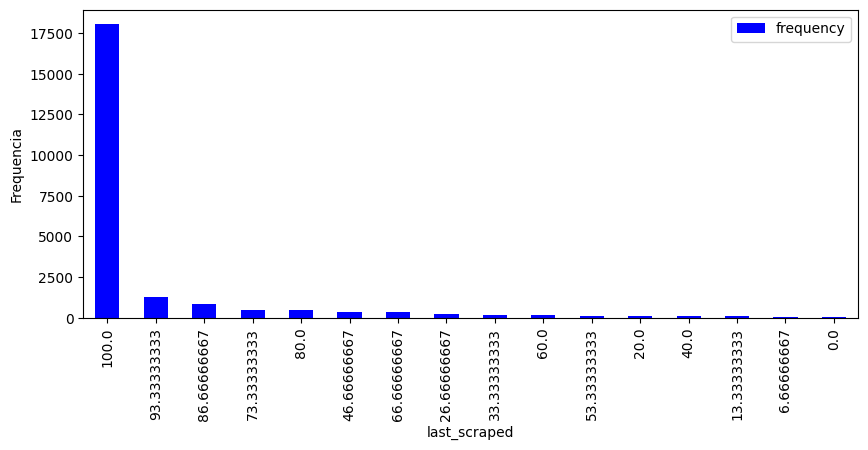

In [333]:
#Realizamos un grafico de barras para visualizar los datos
table9.plot(kind='bar', color='blue', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_scraped')
plt.show()

**Categorización de la variable "“host_total_listings_count”"**

In [334]:
n = 26582
# 1. Obtener valores mínimo y máximo
min_host_total_listings_count = Mexico['host_total_listings_count'].min()
max_host_total_listings_count = Mexico['host_total_listings_count'].max()
Limites = [min_host_total_listings_count, max_host_total_listings_count]
print("Limites: ",Limites)

#Calculamos el rango R
R = max_host_total_listings_count - min_host_total_listings_count
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [1.0, 39.0]
R:  38.0
ni:  15.689631010177528
i:  2.4219817518557454


In [335]:
#Categorización de variables
intervalos = np.linspace(min_host_total_listings_count, max_host_total_listings_count, 17)
intervalos

array([ 1.   ,  3.375,  5.75 ,  8.125, 10.5  , 12.875, 15.25 , 17.625,
       20.   , 22.375, 24.75 , 27.125, 29.5  , 31.875, 34.25 , 36.625,
       39.   ])

In [336]:
# Definir las etiquetas
labels2 = [ 1 ,  3.533,6.066,8.6, 11.133,
       13.66666667, 16.2, 18.733, 21.266, 23.8,
       26.333, 28.866, 31.4, 33.933, 36.466,
       39]

In [337]:
#Finalmente creamos las labels2 en la columna numerica
Mexico['host_total_listings_count'] = pd.cut(x= Mexico['host_total_listings_count'], bins=intervalos, labels=labels2)
Mexico['host_total_listings_count']

0              NaN
1        13.666667
2         3.533000
3         3.533000
4         6.066000
           ...    
26577     6.066000
26578    16.200000
26579    16.200000
26580    16.200000
26581     6.066000
Name: host_total_listings_count, Length: 26582, dtype: category
Categories (16, float64): [1.000 < 3.533 < 6.066 < 8.600 ... 31.400 < 33.933 < 36.466 < 39.000]

In [338]:
#Obtengo un analisis univariado de la variable categorica host_total_listings_count
table10 = freq_tbl(Mexico['host_total_listings_count'])
table10 = table10.drop(['percentage', 'cumulative_perc'], axis=1)
table10 = table10.set_index('host_total_listings_count')
table10

frequency
host_total_listings_count           
6.066000                        6439
1.000000                        5624
3.533000                        3096
8.600000                        1150
13.666667                        998
11.133000                        991
18.733000                        551
16.200000                        517
26.333000                        428
21.266000                        343
23.800000                        293
28.866000                        292
39.000000                        235
33.933000                        225
36.466000                        202
31.400000                        140

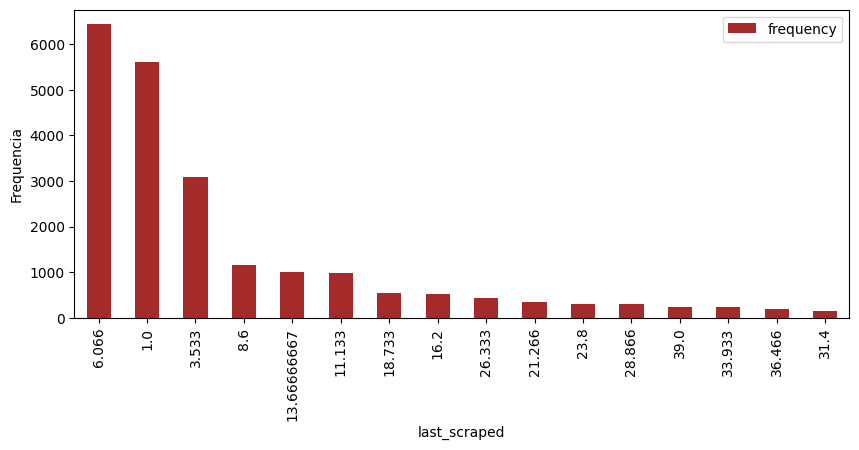

In [339]:
#Realizamos un grafico de barras para visualizar los datos
table10.plot(kind='bar', color='brown', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_scraped')
plt.show()

**Categorización de la variable "accommodates"**

In [340]:
n = 26582
# 1. Obtener valores mínimo y máximo
min_accommodates = Mexico['accommodates'].min()
max_accommodates = Mexico['accommodates'].max()
Limites = [min_accommodates, max_accommodates]
print("Limites: ",Limites)

#Calculamos el rango R
R = max_accommodates - min_accommodates
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [1.0, 7.0]
R:  6.0
ni:  15.689631010177528
i:  0.38241817134564404


In [341]:
#Categorización de variables
intervalos = np.linspace(min_accommodates, max_accommodates, 18)
intervalos

array([1.        , 1.35294118, 1.70588235, 2.05882353, 2.41176471,
       2.76470588, 3.11764706, 3.47058824, 3.82352941, 4.17647059,
       4.52941176, 4.88235294, 5.23529412, 5.58823529, 5.94117647,
       6.29411765, 6.64705882, 7.        ])

In [342]:
labels3= [1.   , 1.375, 1.75 , 2.125, 2.5  , 2.875, 3.25 , 3.625, 4.   ,
       4.375, 4.75 , 5.125, 5.5  , 5.875, 6.25 , 6.625, 7.   ]

In [343]:
#Finalmente creamos las categorias en la columna numerica
Mexico['accommodates'] = pd.cut(x= Mexico['accommodates'], bins=intervalos, labels=labels3)
Mexico['accommodates']

0        1.750
1        2.875
2        4.000
3        1.750
4        1.750
         ...  
26577    4.000
26578    1.750
26579    1.750
26580    1.750
26581    1.750
Name: accommodates, Length: 26582, dtype: category
Categories (17, float64): [1.000 < 1.375 < 1.750 < 2.125 ... 5.875 < 6.250 < 6.625 < 7.000]

In [344]:

#Obtengo un analisis univariado de la variable categorica accommodates
table11 = freq_tbl(Mexico['accommodates'])
table11 = table11.drop(['percentage', 'cumulative_perc'], axis=1)
table11 = table11[table11['frequency'] > 0]
table11 = table11.set_index('accommodates')
table11

frequency
accommodates           
1.750             10620
4.000              5690
2.875              3753
6.250              1800
5.125              1375
7.000               311

<Axes: ylabel='frequency'>

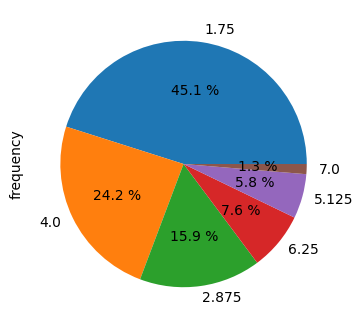

In [345]:
#realizamos grafico de pastel del dataframe filtrado
table11["frequency"].plot(kind='pie', figsize=(5, 4), autopct='%0.1f %%')

**Categorización de la variable "beds"**

In [346]:
n = 26582
# 1. Obtener valores mínimo y máximo
min_beds = Mexico['beds'].min()
max_beds = Mexico['beds'].max()
Limites = [min_beds, max_beds]
print("Limites: ",Limites)

#Calculamos el rango R
R = max_beds - min_beds
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [1.0, 3.0]
R:  2.0
ni:  15.689631010177528
i:  0.12747272378188135


In [347]:
# Definir intervalos manualmente
bins = [1, 1.63, 1.97, 2, 3]  # Definir cortes para cada categoría
labels = ['Una cama', '1.97 Camas', '2 Camas', '3 Camas']

# Asignar categorías a 'beds'
Mexico['beds'] = pd.cut(Mexico['beds'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['beds'].value_counts())

beds
Una cama      14328
2 Camas        6467
1.97 Camas     2953
3 Camas        2834
Name: count, dtype: int64


In [348]:
#Obtengo un analisis univariado de la variable categorica beds
table12 = freq_tbl(Mexico['beds'])
table12 = table12.drop(['percentage', 'cumulative_perc'], axis=1)
table12 = table12.set_index('beds')
table12

frequency
beds                 
Una cama        14328
2 Camas          6467
1.97 Camas       2953
3 Camas          2834

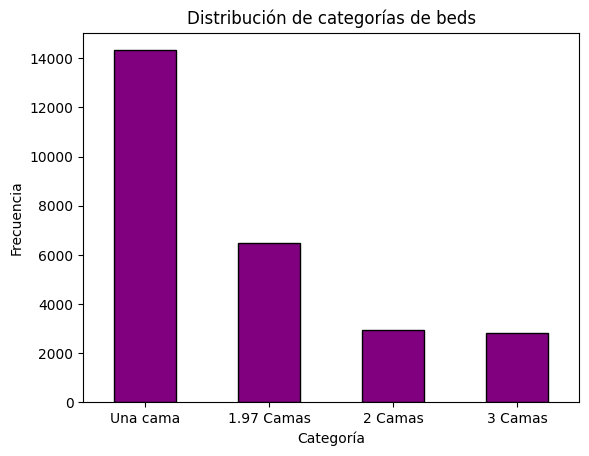

In [349]:
# Crear etiquetas personalizadas para el eje X
etiquetas_personalizadas = ['Una cama', '1.97 Camas', '2 Camas', '3 Camas']

# Gráfico de barras
table12.plot(kind='bar', color='purple', edgecolor='black', legend=False)
plt.title('Distribución de categorías de beds')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(range(len(etiquetas_personalizadas)), etiquetas_personalizadas, rotation=0)  # Personalizar etiquetas
plt.show()

**Categorización de la variable "price"**

In [350]:
n = 26582
# 1. Obtener valores mínimo y máximo
min_price = Mexico['price'].min()
max_price = Mexico['price'].max()
Limites = [min_price, max_price]
print("Limites: ",Limites)

#Calculamos el rango R
R = max_price - min_price
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [0.0, 2977.0]
R:  2977.0
ni:  15.689631010177528
i:  189.74314934933037


In [351]:
#Categorización de variables
intervalos = np.linspace(min_price, max_price, 17)
intervalos

array([   0.    ,  186.0625,  372.125 ,  558.1875,  744.25  ,  930.3125,
       1116.375 , 1302.4375, 1488.5   , 1674.5625, 1860.625 , 2046.6875,
       2232.75  , 2418.8125, 2604.875 , 2790.9375, 2977.    ])

In [352]:
labels4 = [   0.        ,  198.46666667,  396.93333333,  595.4       ,
        793.86666667,  992.33333333, 1190.8       , 1389.26666667,
       1587.73333333, 1786.2       , 1984.66666667, 2183.13333333,
       2381.6       , 2580.06666667, 2778.53333333, 2977.        ]

In [353]:
#Finalmente creamos las categorias en la columna numerica
Mexico['price'] = pd.cut(x= Mexico['price'], bins=intervalos, labels=labels4)
Mexico['price']

0         992.333333
1                NaN
2        1984.666667
3        1190.800000
4         992.333333
            ...     
26577     396.933333
26578    2977.000000
26579    2778.533333
26580    2580.066667
26581    1389.266667
Name: price, Length: 26582, dtype: category
Categories (16, float64): [0.000000 < 198.466667 < 396.933333 < 595.400000 ... 2381.600000 < 2580.066667 < 2778.533333 < 2977.000000]

In [354]:
#Obtengo un analisis univariado de la variable categorica price
table13 = freq_tbl(Mexico['price'])
table13 = table13.drop(['percentage', 'cumulative_perc'], axis=1)
table13 = table13.set_index('price')
table13

frequency
price                 
992.333333        4538
396.933333        3107
793.866667        2966
595.400000        2741
1190.800000       2121
198.466667        1910
1389.266667       1399
1587.733333       1265
1786.200000        913
1984.666667        846
2183.133333        479
2381.600000        390
2580.066667        389
2977.000000        255
2778.533333        228
0.000000           107

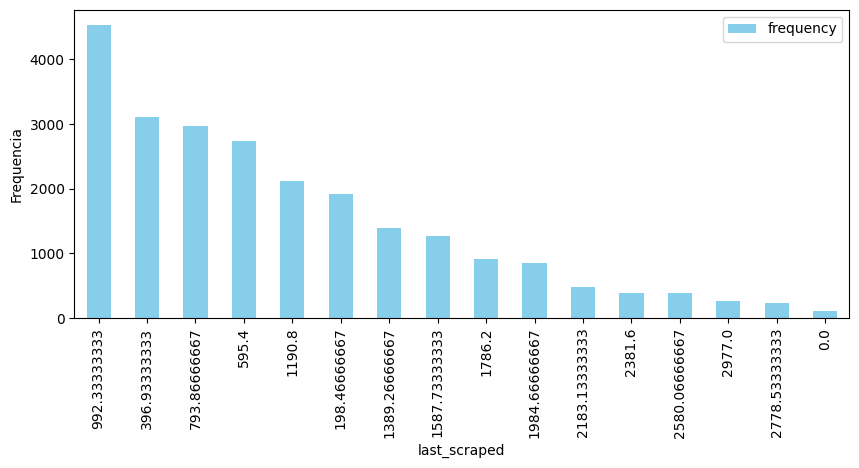

In [355]:
#Realizamos un grafico de barras para visualizar los datos
table13.plot(kind='bar', color='skyblue', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_scraped')
plt.show()

**Categorización de la variable "availability_365"**

In [356]:
n = 26582
# 1. Obtener valores mínimo y máximo
min_availability_365 = Mexico['availability_365'].min()
max_availability_365 = Mexico['availability_365'].max()
Limites = [min_availability_365, max_availability_365]
print("Limites: ",Limites)

#Calculamos el rango R
R = max_availability_365 - min_availability_365
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [0, 365]
R:  365
ni:  15.689631010177528
i:  23.263772090193346


In [357]:
#Categorización de variables
intervalos = np.linspace(min_availability_365, max_availability_365, 17)
intervalos

array([  0.    ,  22.8125,  45.625 ,  68.4375,  91.25  , 114.0625,
       136.875 , 159.6875, 182.5   , 205.3125, 228.125 , 250.9375,
       273.75  , 296.5625, 319.375 , 342.1875, 365.    ])

In [358]:
labels5 = [0,24.33333333,48.66666667,73, 97.33333333,121.66666667,146,170.33333333,194.66666667, 219, 243.33333333, 267.66666667,292, 316.33333333, 340.66666667, 365]

In [359]:
#Finalmente creamos las categorias en la columna numerica
Mexico['availability_365'] = pd.cut(x= Mexico['availability_365'], bins=intervalos, labels=labels5)
Mexico['availability_365']

0        365.000000
1        340.666667
2        340.666667
3        267.666667
4        292.000000
            ...    
26577    365.000000
26578    170.333333
26579    170.333333
26580    170.333333
26581    146.000000
Name: availability_365, Length: 26582, dtype: category
Categories (16, float64): [0.000000 < 24.333333 < 48.666667 < 73.000000 ... 292.000000 < 316.333333 < 340.666667 < 365.000000]

In [360]:
#Obtengo un analisis univariado de la variable categorica availability_365
table14 = freq_tbl(Mexico['availability_365'])
table14 = table14.drop(['percentage', 'cumulative_perc'], axis=1)
table14 = table14.set_index('availability_365')
table14

frequency
availability_365           
365.000000             6310
340.666667             2905
267.666667             2541
73.000000              1812
170.333333             1480
316.333333             1477
243.333333             1151
48.666667              1050
146.000000             1008
292.000000              819
24.333333               720
121.666667              683
0.000000                669
219.000000              633
97.333333               562
194.666667              402

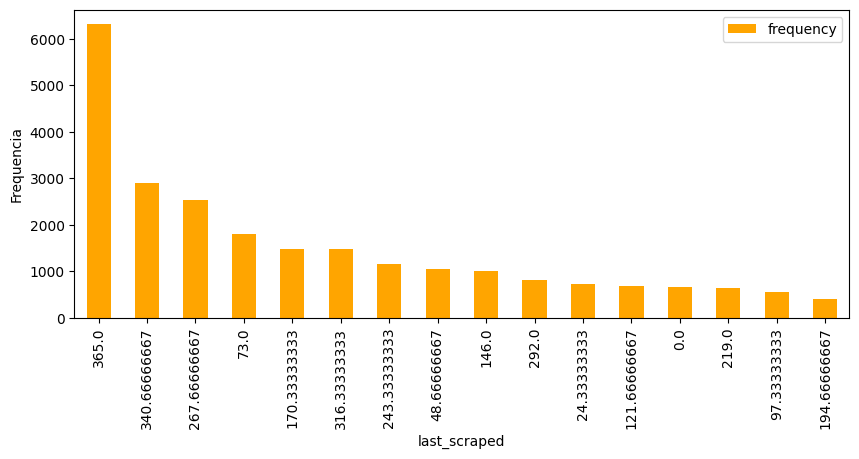

In [361]:
#Realizamos un grafico de barras para visualizar los datos
table14.plot(kind='bar', color='orange', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_scraped')
plt.show()